"""<br>
@Author:Vijay Kumar M N<br>
@Date: 2024-11-12<br>
@Last Modified by:Vijay Kumar M N<br>
@Last Modified: 2024-11-12<br>
@Title :Python Program to salary dataset will he make more than 50k or not<br>
"""

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [448]:
columns = ['age', 'workclass', 'id', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df=pd.read_csv('classification_2.csv',names=columns)
print(df.isnull().sum())
print(df.shape)

age               0
workclass         0
id                0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
(32561, 15)


removing the unwanted columns or taking only necessary columns

In [449]:
df=df[['workclass','education','marital-status','income']]
df

,workclass,education,marital-status,income
0,State-gov,Bachelors,Never-married,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,<=50K
2,Private,HS-grad,Divorced,<=50K
3,Private,11th,Married-civ-spouse,<=50K
4,Private,Bachelors,Married-civ-spouse,<=50K
...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,<=50K
32557,Private,HS-grad,Married-civ-spouse,>50K
32558,Private,HS-grad,Widowed,<=50K
32559,Private,HS-grad,Never-married,<=50K


In [450]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   income          32561 non-null  object
dtypes: object(4)
memory usage: 1017.7+ KB


,workclass,education,marital-status,income
count,32561,32561,32561,32561
unique,9,16,7,2
top,Private,HS-grad,Married-civ-spouse,<=50K
freq,22696,10501,14976,24720


In [451]:
df.isnull().sum()

workclass         0
education         0
marital-status    0
income            0
dtype: int64

In [452]:
'''categorical_columns = ['workclass', 'education', 'marital-status', 'income']
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

df.info()
print(df)'''

"categorical_columns = ['workclass', 'education', 'marital-status', 'income']\nfor column in categorical_columns:\n    mode_value = df[column].mode()[0]\n    df[column].fillna(mode_value, inplace=True)\n\ndf.info()\nprint(df)"

In [453]:
# Handling missing values (replace '?' with NaN and drop missing)
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

In [454]:
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'y':  # Exclude the target variable
        df[col] = label_encoder.fit_transform(df[col])

print(df.shape)

(30725, 4)


In [455]:
X = df.drop(['income'], axis=1)#features

y = df['income']#target variable



In [456]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [457]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [458]:
# Train a KNN model
model =  KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [459]:
# Predict on test set
y_pred = model.predict(X_test)

In [460]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[6474  451]
 [1206 1087]]


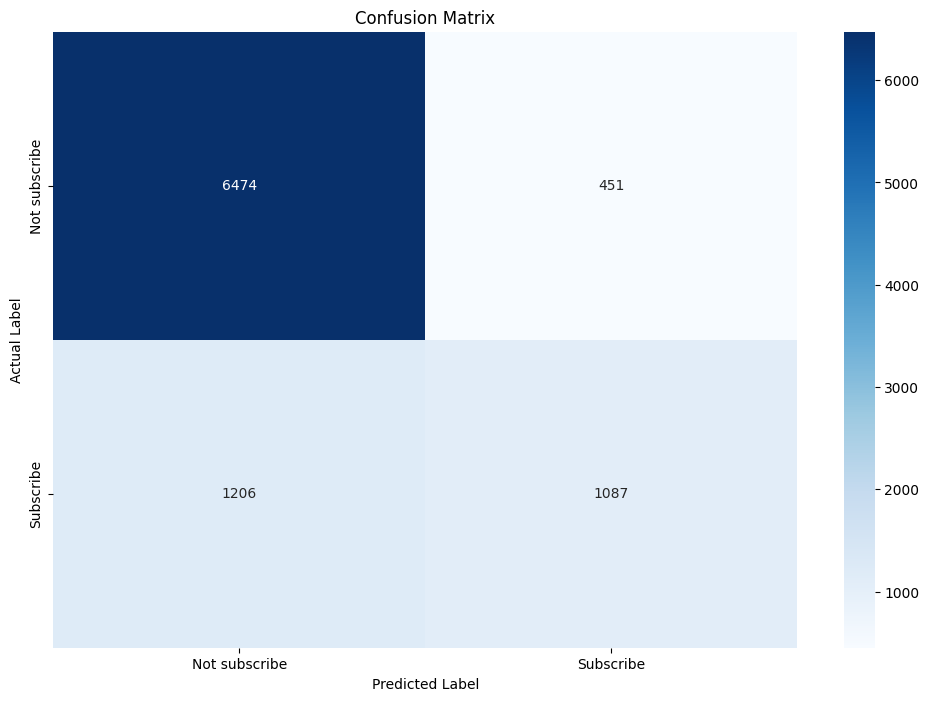

In [461]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not subscribe','Subscribe'], 
            yticklabels=['Not subscribe','Subscribe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [462]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8202430028205685
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      6925
           1       0.71      0.47      0.57      2293

    accuracy                           0.82      9218
   macro avg       0.77      0.70      0.73      9218
weighted avg       0.81      0.82      0.81      9218



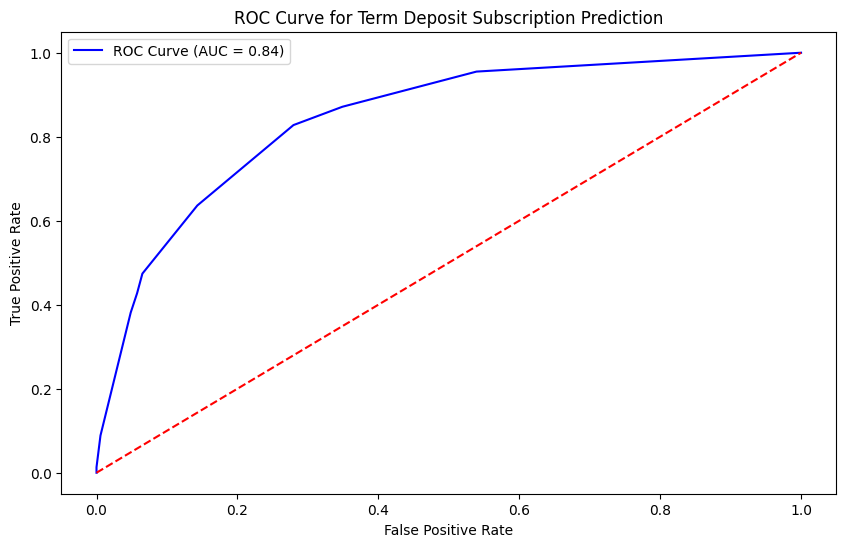

In [463]:
# Get prediction probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Term Deposit Subscription Prediction')
plt.legend()
plt.show()
